# Optimization: principles and algorithms


Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.<br>
The numbering of the algorithms, tables and page refer to the book.

## Chapter 11: Descent methods and line search

### Algorithm 11.2: Initialization of the exact line search 

In [1]:
def initLineSearch(obj,delta):
    xkm1 = 0
    hxkm1 = obj(xkm1)
    xk = delta
    hxk = obj(xk)
    while hxk <= hxkm1:
        xkm2 = xkm1
        hxkm2 = hxkm1
        xkm1 = xk ; 
        hxkm1 = hxk ; 
        xk = 2.0 * xk ;
        hxk = obj(xk) ;
    return(xkm2,hxkm2,xkm1,hxkm1,xk,hxk) 

Test with Example 11.3: $h(x) = (2+x) \cos(2+x)$.

In [2]:
import numpy as np
def h(x):
    return (2.0+x)*np.cos(2.0+x)
delta = 6
(a,ha,b,hb,c,hc) = initLineSearch(h,delta)
print (a,ha,b,hb,c,hc) 

0 -0.8322936730942848 6 -1.1640002704689083 12.0 1.9143210549096705


### Algorithm 11.3: Exact line search: quadratic interpolation

In [3]:
def quadraticInterpolation(obj,delta,eps):
    (a,ha,b,hb,c,hc) = initLineSearch(obj,delta)
    k = 1
    iters = list()
    s1 = max(ha,hc)-hb
    s2 = c-a
    while s1 > eps and s2 > eps:
        beta1 = ((b-c)*ha+(c-a)*hb+(a-b)*hc)/((a-b)*(c-a)*(c-b))
        beta2 = hb / (b-a)
        beta3 = ha / (a-b)
        xplus = (beta1 * (a+b) - beta2 - beta3) / (2 * beta1)
        if xplus == b:
            if (b-a) < (c-b):
                xplus =  b + eps / 2.0
            else:
                xplus =  b - eps / 2.0
        hxplus = obj(xplus)
        iters.append([a,b,c,xplus,ha,hb,hc,hxplus])
        if xplus > b:
            if hxplus > hb:
                c = xplus
                hc = hxplus
            else:
                a = b
                ha = hb
                b = xplus
                hb = hxplus
        else:
            if hxplus > hb:
                a = xplus
                ha = hxplus
            else:
                c = b
                hc = hb
                b = xplus
                hb = hxplus
        s1 = max(ha,hc)-hb
        s2 = c-a
        k = k + 1
    iters.append([a,b,c,xplus,ha,hb,hc,hxplus])
    return(b,iters) 


Test with Example 11.3: $h(x) = (2+x) \cos(2+x)$.

In [4]:
(xstar,iters) = quadraticInterpolation(h,6,1.0e-3)
xstar

7.529334402960935

Table 11.2, p.256.

In [5]:
print("k\ta\t\tb\t\tc\t\tx*\t\th(a)\t\th(b)\t\th(c)\th(x^*)")
for k in range(len(iters)):
    print("{}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}".format(k+1,*(iters[k])))


k	a		b		c		x*		h(a)		h(b)		h(c)	h(x^*)
1	 0.00000	 6.00000	12.00000	 3.58364	-0.83229	-1.16400	 1.91432	 4.27225
2	 3.58364	 6.00000	12.00000	 8.21855	 4.27225	-1.16400	 1.91432	-7.16487
3	 6.00000	 8.21855	12.00000	 8.69855	-1.16400	-7.16487	 1.91432	-3.13122
4	 6.00000	 8.21855	 8.69855	 7.43782	-1.16400	-7.16487	-3.13122	-9.43702
5	 6.00000	 7.43782	 8.21855	 7.45558	-1.16400	-9.43702	-7.16487	-9.45109
6	 7.43782	 7.45558	 8.21855	 7.52836	-9.43702	-9.45109	-7.16487	-9.47729
7	 7.45558	 7.52836	 8.21855	 7.52898	-9.45109	-9.47729	-7.16487	-9.47729
8	 7.52836	 7.52898	 8.21855	 7.52933	-9.47729	-9.47729	-7.16487	-9.47729
9	 7.52898	 7.52933	 8.21855	 7.52933	-9.47729	-9.47729	-7.16487	-9.47729
10	 7.52933	 7.52933	 8.21855	 7.52933	-9.47729	-9.47729	-7.16487	-9.47729
11	 7.52933	 7.52933	 8.21855	 7.52933	-9.47729	-9.47729	-7.16487	-9.47729
12	 7.52933	 7.52933	 8.21855	 7.52933	-9.47729	-9.47729	-7.16487	-9.47729
13	 7.52933	 7.52933	 7.52933	 7.52933	-9.47729	-9.47729	-9.47729	-9.4

Figure 11.2, page 255.

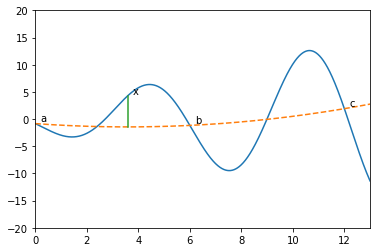

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Quadratic imerpolant. See pp. 252-253
def interpolant(iters,iteration):
    (a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
    (ap,bp,cp,xp,hap,hbp,hcp,hxp) = tuple(iters[iteration])
    b3 = ha / (a-b)
    b2 = hb / (b-a)
    b1num = (b-c) * ha + (c-a) * hb + (a-b) * hc
    b1denom = (a-b) * (c-a) * (c-b) 
    b1 = b1num / b1denom
    def q(x):
        return(b1 * (x-a) * (x-b) + b2 * (x-a) + b3 * (x-b))
    return q

iteration = 0
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(0, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

Figure 11.3, page 255

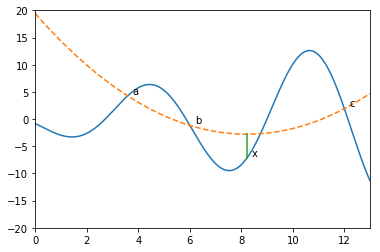

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
iteration = 1
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(0, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

Figure 11.4, page 257

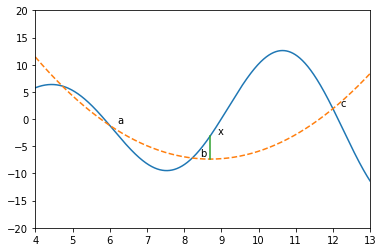

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
iteration = 2
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(4, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

Figure 11.5, page 257

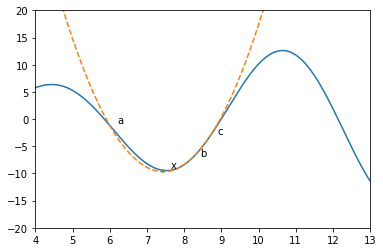

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
iteration = 3
q = interpolant(iters,iteration)
(a,b,c,x,ha,hb,hc,hx) = tuple(iters[iteration])
xrange = np.arange(0.0,13.0,0.001)
plt.plot(xrange,h(xrange),'-',xrange,q(xrange),'--')
shift = 0.2
plt.annotate('a',xy=(a,ha),xytext=(a+shift,ha+2*shift))
plt.annotate('b',xy=(b,hb),xytext=(b+shift,hb+2*shift))
plt.annotate('c',xy=(c,hc),xytext=(c+shift,hc+2*shift))
plt.annotate('x',xy=(x,hx),xytext=(x+shift,hx+2*shift))
xopt,yopt = [x,x],[q(x),(h(x))]
plt.xlim(4, 13)
plt.ylim(-20, 20)
plt.plot(xopt,yopt)
plt.show()

### Algorithm 11.4: Exact line search: golden section

In [10]:
def goldenSection(obj,l,u,eps):
    rho = (3.0 - np.sqrt(5.0)) / 2.0
    alpha1 = l + rho * (u - l)
    h1 = obj(alpha1) 
    alpha2 = u - rho * (u - l)
    h2 = obj(alpha2) 
    iters = list()
    iters.append([l,alpha1,alpha2,u,h1,h2])
    k = 1
    while (u - l) > eps:
        if (h1 == h2):
            l = alpha1
            u = alpha2 
            alpha1 = l + rho * (u - l)
            h1 = obj(alpha1)
            alpha2 = u - rho * (u - l)
            h2 = obj(alpha2) ;
        elif (h1 > h2):
            l = alpha1
            alpha1 = alpha2
            h1 = h2
            alpha2 = u - rho * (u - l)
            h2 = obj(alpha2)
        else:
            u = alpha2
            alpha2 = alpha1
            h2 = h1
            alpha1 = l + rho * (u - l)
            h1 = obj(alpha1)
        k += 1
        iters.append([l,alpha1,alpha2,u,h1,h2])
    xstar = (l+u)/2.0
    return (xstar,iters)

Test with Example 11.3: $h(x) = (2+x) \cos(2+x)$.

In [11]:
(xstar,iters) = goldenSection(h,5,10,1.0e-3)
xstar

7.5293254974342965

Table 11.3, page 261.

In [12]:
print("k\tl\t\talpha1\t\talpha2\t\tu\t\th(alpha1)\th(alpha2)")
for k in range(len(iters)):
    print("{}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}\t{:8.5f}".format(k+1,*(iters[k])))


k	l		alpha1		alpha2		u		h(alpha1)	h(alpha2)
1	 5.00000	 6.90983	 8.09017	10.00000	-7.75439	-7.93768
2	 6.90983	 8.09017	 8.81966	10.00000	-7.93768	-1.89353
3	 6.90983	 7.63932	 8.09017	 8.81966	-9.41833	-7.93768
4	 6.90983	 7.36068	 7.63932	 8.09017	-9.34146	-9.41833
5	 7.36068	 7.63932	 7.81153	 8.09017	-9.41833	-9.08684
6	 7.36068	 7.53289	 7.63932	 7.81153	-9.47723	-9.41833
7	 7.36068	 7.46711	 7.53289	 7.63932	-9.45863	-9.47723
8	 7.46711	 7.53289	 7.57354	 7.63932	-9.47723	-9.46780
9	 7.46711	 7.50776	 7.53289	 7.57354	-9.47504	-9.47723
10	 7.50776	 7.53289	 7.54842	 7.57354	-9.47723	-9.47553
11	 7.50776	 7.52329	 7.53289	 7.54842	-9.47712	-9.47723
12	 7.52329	 7.53289	 7.53882	 7.54842	-9.47723	-9.47686
13	 7.52329	 7.52922	 7.53289	 7.53882	-9.47729	-9.47723
14	 7.52329	 7.52696	 7.52922	 7.53289	-9.47727	-9.47729
15	 7.52696	 7.52922	 7.53062	 7.53289	-9.47729	-9.47729
16	 7.52696	 7.52836	 7.52922	 7.53062	-9.47729	-9.47729
17	 7.52836	 7.52922	 7.52976	 7.53062	-9.47729	-9.47

Figure 11.8, page 261

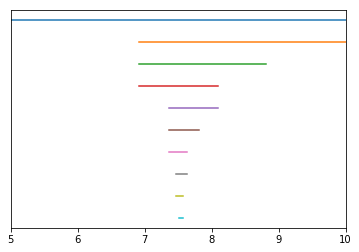

In [13]:
nbr = 10
plt.xlim(5,10)
for k in range(nbr):
    l = iters[k][0]
    u = iters[k][3]
    plt.plot([l,u],[nbr-k/2,nbr-k/2])   
plt.tick_params(
    axis='y',          
    left=False,        
    labelleft = False)      
plt.show()

### Algorithm 11.5: Line search

In [14]:
# Declare an exception
from optimizationExceptions import *

# Define a function simple to call for the inner product
def scalarInner(a,b):
    return np.asscalar(a.T.dot(b)) 


def lineSearch(obj,x,d,alpha0,beta1,beta2,lbd):
    if  lbd <= 1:
        raise OptimizationValueOutOfRange("lambda is {} and must be > 1".format(lbd))
    if  alpha0 <= 0:
        raise OptimizationValueOutOfRange("alpha0 is {} and must be > 0".format(alpha0))
    if  beta1 >= beta2:
        raise OptimizationValueOutOfRange("Incompatible Wolfe cond. parsmeters: beta1={} is greater than beta2={}".format(beta1,beta2))
    (f,g) = obj(x)
    deriv = scalarInner(g,d)
    if deriv >= 0:
        raise OptimizationInputError("d is not a descent direction: {} >= 0".format(deriv))
    i = 0
    alpha = alpha0
    alphal = 0
    alphar = np.finfo(np.float128).max
    finished = False
    iters = list()
    iters.append([alpha,alphal,alphar,""])
    while not finished:
        xnew = x+alpha * d ;
        (fnew,gnew) = obj(xnew)
        # First Wolfe condition
        if fnew > f + alpha * beta1 * deriv:
            reason = "too long"
            alphar = alpha ;
            alpha = (alphal + alphar) / 2.0 ;
        # Second Wolfe condition
        elif scalarInner(gnew,d) < beta2 * deriv:
            reason = "too short"
            alphal = alpha ;
            if alphar == np.finfo(np.float128).max:
                alpha = lbd * alpha ;
            else:
                alpha = (alphal + alphar) / 2.0
        else:
            reason = "ok"
            finished = True
        iters.append([alpha,alphal,alphar,reason])
    return (alpha,iters)


Example 11.2: $f(x) = \frac{1}{2} x_1^2 + \frac{9}{2} x_2^2$.

In [15]:
def ex1102(x):
    f = 0.5 * x.item(0) * x.item(0) + 4.5 * x.item(1) * x.item(1)
    g = np.array([[x.item(0)],[9 * x.item(1)]])
    H = np.array([[1,0],[0,9]])
    return (f,g)


In [16]:
x = np.array([[10],[1]])
d = np.array([[-2/np.sqrt(5)],[1/np.sqrt(5)]])
alpha0 = 1.0e-3
beta1 = 0.3
beta2 = 0.7
lbd = 20
(alpha,iters) = lineSearch(ex1102,x,d,alpha0,beta1,beta2,lbd)
print(alpha)

2.3000000000000003


Table 11.6, page 275

In [17]:
print("alpha\t\talpha_l\t\talpha_u\t\tReason")
for k in range(len(iters)):
    print("{:+E}\t{:+E}\t{:+13E}\t{:}".format(*(iters[k])))

alpha		alpha_l		alpha_u		Reason
+1.000000E-03	+0.000000E+00	         +INF	
+2.000000E-02	+1.000000E-03	         +INF	too short
+4.000000E-01	+2.000000E-02	         +INF	too short
+8.000000E+00	+4.000000E-01	         +INF	too short
+4.200000E+00	+4.000000E-01	+8.000000E+00	too long
+2.300000E+00	+4.000000E-01	+4.200000E+00	too long
+2.300000E+00	+4.000000E-01	+4.200000E+00	ok


### Algorithm 11.6: Steepest descent

In [18]:
from scipy import linalg
# Parameters for the line search
alpha0 = 1.0
beta1 = 1.0e-4
beta2 = 0.99
lbd = 2
def steepestDescent(obj,x0,eps,maxiter = 100):
    xk = x0
    (f,g) = obj(xk)
    iters = list()
    iters.append([xk,f,linalg.norm(g)])
    k = 0
    while linalg.norm(g) > eps and k < maxiter:
        alpha,lsiters = lineSearch(obj,xk,-g,alpha0,beta1,beta2,lbd)
        xk = xk - alpha * g ;
        (f,g) = obj(xk)
        k += 1
        iters.append([xk,f,linalg.norm(g)])
    return (xk,iters)


In [19]:
from optimizationExamples import exRosenbrock
x0 = np.array([[-1.5],[1.5]])
eps = 1.0e-15
(sol,iters) = steepestDescent(exRosenbrock,x0,eps,10000)
print(sol)

[[0.99996357]
 [0.99992709]]


Figure 11.19 (a), page 282

In [20]:
print("({},{})".format(iters[0][0][0],iters[0][0][1]))

([-1.5],[1.5])


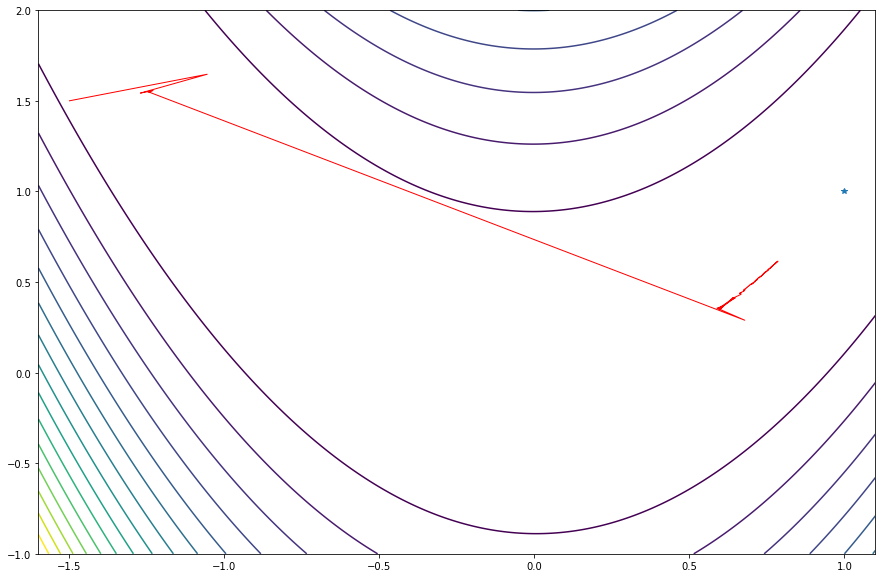

In [27]:
def theFunctionToPlot(x,y):
    return(100 * (y-x*x)**2+(1-x)**2)

xmin = -1.6
xmax = 1.1
xlist = np.linspace(xmin,xmax,1000)
ymin = -1
ymax = 2
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.rcParams["figure.figsize"] = [15,10]
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(200)]
yiter = [iters[k][0].item(1) for k in range(200)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r')
plt.plot(1,1,marker='*')
plt.show()

Figure 11.19 (b), page 282

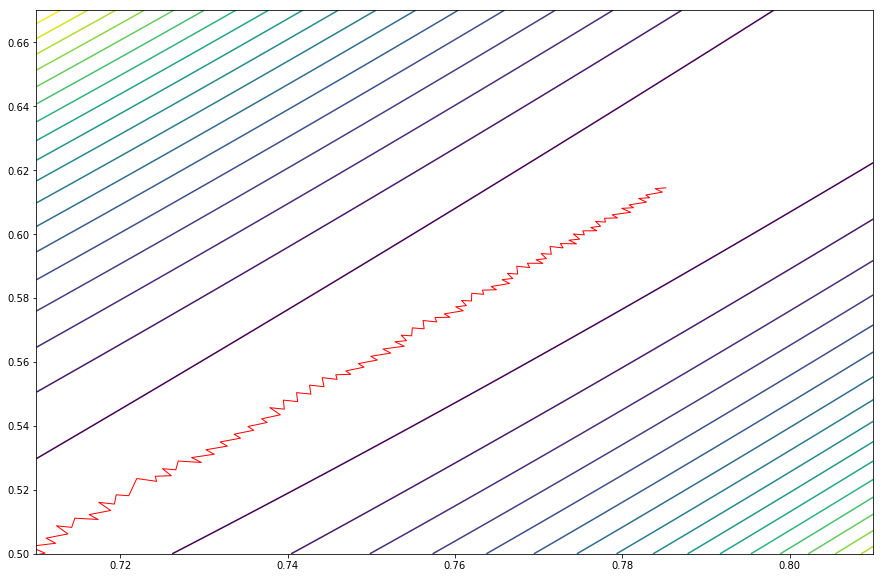

In [22]:
xmin = 0.71
xmax = 0.81
xlist = np.linspace(xmin,xmax,1000)
ymin = 0.5
ymax = 0.67
ylist = np.linspace(ymin,ymax,1000)
X,Y = np.meshgrid(xlist,ylist)
Z = theFunctionToPlot(X,Y)
plt.contour(X,Y,Z,20)
xiter = [iters[k][0].item(0) for k in range(200)]
yiter = [iters[k][0].item(1) for k in range(200)]
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.plot(xiter,yiter, linewidth=1, color='r')
plt.rcParams["figure.figsize"] = [15,10]
plt.show()

### Algorithm 11.7: Modified Cholesky factorization

In [23]:
from optimizationExceptions import *

def modifiedCholesky(A):
    tau = 0.0
    (m,n) = A.shape
    if m != n:
        raise OptimizationInputError("The matrix must be square and not ({},{})".format(m,n))
    if not (A.transpose() == A).all():
        raise OptimizationInputError("The matrix must be symmetric.")

    frobeniusNorm = linalg.norm(A)
    if frobeniusNorm <= 1.0e-6:
        frobeniusNorm = 1.0e-6
    mindiag = min(A.diagonal())
    if mindiag >= 0:
        tau = 0
        R = A
    else: 
        tau = frobeniusNorm
        R = A + tau * np.eye(n)
    mineig = min(linalg.eigvalsh(R))
    while mineig <= 0:
        tau = max(2 * tau, 0.5 * frobeniusNorm)
        R = A + tau * np.eye(n)
        mineig = min(linalg.eigvalsh(R))
    return linalg.cholesky(R).T ,tau

In [24]:
A = np.array([[    1.0000  ,  3.5000  ,  6.0000  ,  8.5000],
   [ 3.5000 ,   6.0000   , 8.5000 ,  11.0000],
   [ 6.0000  ,  8.5000 ,  11.0000  , 13.5000],
   [ 8.5000  , 11.0000  , 13.5000  , 16.0000]])

In [25]:
(L,tau) = modifiedCholesky(A)
print("tau = ",tau)
print(L)

tau =  18.748333259252675
[[4.44390968 0.         0.         0.        ]
 [0.78759476 4.91202888 0.         0.        ]
 [1.35016245 1.51396079 5.06293564 0.        ]
 [1.91273014 1.93271334 1.57842247 4.98628101]]


We have that $L L^T = A + \tau I$ or, equavalently, $L L^T - A = \tau I$. 

In [26]:
np.matmul(L,L.T)-A

array([[1.87483333e+01, 4.44089210e-16, 8.88178420e-16, 0.00000000e+00],
       [4.44089210e-16, 1.87483333e+01, 0.00000000e+00, 0.00000000e+00],
       [8.88178420e-16, 0.00000000e+00, 1.87483333e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.87483333e+01]])